In [1]:
import pandas as pd

# Read the data
df_full = pd.read_csv('./data/train.csv', index_col='Id')
df_test_full = pd.read_csv('./data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
df_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
'''
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)
'''
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in df_full.columns if
                    df_full[cname].nunique() < 10 and 
                    df_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df_full.columns if 
                df_full[cname].dtype in ['int64', 'float64']]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
df_full = df_full[my_cols].copy()

#now remove 'SalePrice' from numerical columns so we don't try to apply transformations to it later
#'numerical_cols' is used for transformations throughout this script
numerical_cols.remove('SalePrice')

#df_test_full = df_test_full[my_cols].copy()
'''
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()
'''
df_full.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,61,0,0,0,0,0,2,2008,208500
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,...,298,0,0,0,0,0,0,5,2007,181500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,42,0,0,0,0,0,9,2008,223500
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,0,35,272,0,0,0,0,2,2006,140000
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,192,84,0,0,0,0,0,12,2008,250000


In [2]:
from sklearn.model_selection import train_test_split

def dataFrameTestValidXY(df):
    df_copy = df.copy()
    y = df_copy['SalePrice']
    X = df_copy.drop(columns=['SalePrice'])

    # Break off validation set from training data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
    
    return X_train, X_valid, y_train, y_valid

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def calculateMAE(Xt, Xv, yt, yv):
#Check performance at this point to see if there's any gains

    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='constant')

    # Preprocessing for onehot data
    onehot_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Preprocessing for ordinal data
    ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('ordinal', ordinal_transformer, ordinal_features),
            ('onehot', onehot_transformer, onehot_features)
        ])

    # Define model
    model = RandomForestRegressor(n_estimators=100, random_state=0)

    # Bundle preprocessing and modeling code in a pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)
                         ])

    # Preprocessing of training data, fit model 
    clf.fit(Xt, yt)

    # Preprocessing of validation data, get predictions
    preds = clf.predict(Xv)

    print('MAE:', mean_absolute_error(y_valid, preds))
    
    # r2_train = r2_score(y_train, model.predict(X_train))
    # r2_valid = r2_score(y_valid, model.predict(X_valid))
    # print(f'r2_train: {r2_train}')
    # print(f'r2_valid: {r2_valid}')

In [45]:

def lrCalculateMAE(Xt, Xv, yt, yv):
#Check performance at this point to see if there's any gains

    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='constant')

    # Preprocessing for onehot data
    onehot_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Preprocessing for ordinal data
    ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('ordinal', ordinal_transformer, ordinal_features),
            ('onehot', onehot_transformer, onehot_features)
        ])

    # Define model
#    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model = LinearRegression()
    # Bundle preprocessing and modeling code in a pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)
                         ])

    # Preprocessing of training data, fit model 
    clf.fit(Xt, yt)
    print(f'--Xt: {Xt.shape}')
    # Preprocessing of validation data, get predictions
    preds = clf.predict(Xv)

    mae = mean_absolute_error(yv, preds)
    print('MAE:', mae)
    
    return mae, model, preds, Xt, yt, yt, yv
    


In [5]:
X_train, X_valid, y_train, y_valid = dataFrameTestValidXY(df_full)
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


# Base Model Prediction

In [6]:


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

X_train, X_valid, y_train, y_valid = dataFrameTestValidXY(df_full)

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))


MAE: 17861.780102739725


In [7]:
X_train[categorical_cols].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
ordinal_features = ['Street', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', \
                    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', \
                    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence']

onehot_features = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle', \
                   'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']



In [9]:
def processOrdinalFeatures(X):
    
    #process the ordinal features into integer ranking
    X["Street"] = X["Street"].map({'Grvl':1, 'Pave':2})

    # print(f'OverallQual: \n{X["OverallQual"].value_counts()}')
    X["OverallQual"] = X["OverallQual"].apply(lambda x: 1 if x<=4 else (2 if x <=7 else 3))

    # print(f'OverallCond: \n{X["OverallCond"].value_counts()}')
    X["OverallCond"] = X["OverallCond"].apply(lambda x: 1 if x<=4 else (2 if x <=7 else 3))

    # print(f'ExterQual: \n{X["ExterQual"].value_counts()}')
    X["ExterQual"] = X["ExterQual"].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4})

    # print(f'ExterCond: \n{X["ExterCond"].value_counts()}')
    X["ExterCond"] = X["ExterCond"].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4})

    # print(f'BsmtQual: \n{X["BsmtQual"].value_counts()}')
    X["BsmtQual"] = X["BsmtQual"].map({'NA':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5})

    # print(f'BsmtCond: \n{X["BsmtCond"].value_counts()}')
    X["BsmtCond"] = X["BsmtCond"].map({'NA':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5})

    # print(f'BsmtExposure: \n{X["BsmtExposure"].value_counts()}')
    X["BsmtExposure"] = X["BsmtExposure"].map({'NA':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})

    # print(f'BsmtFinType1: \n{X["BsmtFinType1"].value_counts()}')
    X["BsmtFinType1"] = X["BsmtFinType1"].map({'NA':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    # print(f'BsmtFinType2: \n{X["BsmtFinType2"].value_counts()}')
    X["BsmtFinType2"] = X["BsmtFinType2"].map({'NA':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    # print(f'HeatingQC: \n{X["HeatingQC"].value_counts()}')
    X["HeatingQC"] = X["HeatingQC"].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    # print(f'CentralAir: \n{X["CentralAir"].value_counts()}')
    X["CentralAir"] = X["CentralAir"].map({'N':1, 'Y':2})

    # print(f'Electrical: \n{X["Electrical"].value_counts()}')
    X["Electrical"] = X["Electrical"].map({'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})

    # print(f'KitchenQual: \n{X["KitchenQual"].value_counts()}')
    X["KitchenQual"] = X["KitchenQual"].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    # print(f'Functional: \n{X["Functional"].value_counts()}')
    X["Functional"] = X["Functional"].map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

    # print(f'FireplaceQu: \n{X["FireplaceQu"].value_counts()}')
    X["FireplaceQu"] = X["FireplaceQu"].map({'NA':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    # print(f'GarageFinish: \n{X["GarageFinish"].value_counts()}')
    X["GarageFinish"] = X["GarageFinish"].map({'NA':1, 'Unf':2, 'RFn':3, 'Fin':4})

    # print(f'GarageQual: \n{X["GarageQual"].value_counts()}')
    X["GarageQual"] = X["GarageQual"].map({'NA':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    # print(f'GarageCond: \n{X["GarageCond"].value_counts()}')
    X["GarageCond"] = X["GarageCond"].map({'NA':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    # print(f'PavedDrive: \n{X["PavedDrive"].value_counts()}')
    X["PavedDrive"] = X["PavedDrive"].map({'N':1, 'P':2, 'Y':3})

    # print(f'Fence: \n{X["Fence"].value_counts()}')
    X["Fence"] = X["Fence"].map({'NA':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5})
    
    return X



In [10]:
df_full[ordinal_features].head()

,Street,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,Pave,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,...,Y,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y,NaN
2,Pave,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,...,Y,SBrkr,TA,Typ,TA,RFn,TA,TA,Y,NaN
3,Pave,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,...,Y,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN
4,Pave,7,5,TA,TA,TA,Gd,No,ALQ,Unf,...,Y,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y,NaN
5,Pave,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,...,Y,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN


In [11]:
#Check performance at this point to see if there's any gains
# # Preprocessing of data, fit model 
X_train, X_valid, y_train, y_valid = dataFrameTestValidXY(df_full)
X_train = processOrdinalFeatures(X_train)
X_valid = processOrdinalFeatures(X_valid)
calculateMAE(X_train, X_valid, y_train, y_valid)

# # Preprocessing for numerical data
# numerical_transformer = SimpleImputer(strategy='constant')

# # Preprocessing for onehot data
# onehot_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Preprocessing for ordinal data
# ordinal_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))
# ])

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('ordinal', ordinal_transformer, ordinal_features),
#         ('onehot', onehot_transformer, onehot_features)
#     ])

# # Define model
# model = RandomForestRegressor(n_estimators=100, random_state=0)

# # Bundle preprocessing and modeling code in a pipeline
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('model', model)
#                      ])

# # Preprocessing of training data, fit model 
# X_train, X_valid, y_train, y_valid = dataFrameTestValidXY(df_full)
# X_train = processOrdinalFeatures(X_train)
# X_valid = processOrdinalFeatures(X_valid)
# clf.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
# preds = clf.predict(X_valid)

# print('MAE:', mean_absolute_error(y_valid, preds))


MAE: 17972.754520547947


### Actually performance decreased (slightly) 17861.78->17972.75
What if I Scale the data?

In [12]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_valid, y_train, y_valid = dataFrameTestValidXY(df_full)
X_train = processOrdinalFeatures(X_train)
X_valid = processOrdinalFeatures(X_valid)

scaler = MinMaxScaler().fit(X_train[ordinal_features])

X_train[ordinal_features] = scaler.transform(X_train[ordinal_features])
X_valid[ordinal_features] = scaler.transform(X_valid[ordinal_features])
X_train[ordinal_features].head()

calculateMAE(X_train, X_valid, y_train, y_valid)

MAE: 17982.440273972603


In [13]:
df_full.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [14]:
df_full.shape

(1460, 77)

In [15]:
print(f"PoolQC: {df_full['PoolQC'].value_counts()}")
print(f"MiscFeature: {df_full['MiscFeature'].value_counts()}")
print(f"Alley: {df_full['Alley'].value_counts()}")
print(f"Fence: {df_full['Fence'].value_counts()}")
print(f"FireplaceQu: {df_full['FireplaceQu'].value_counts()}")
print(f"LotFrontage: {df_full['LotFrontage'].value_counts()}")

print(f"BsmtQual: {df_full['BsmtQual'].value_counts()}")
print(f"GarageFinish: {df_full['GarageFinish'].value_counts()}")
print(f"GarageCond: {df_full['GarageCond'].value_counts()}")
print(f"GarageQual: {df_full['GarageQual'].value_counts()}")
print(f"GarageType: {df_full['GarageType'].value_counts()}")
print(f"GarageYrBlt: {df_full['GarageYrBlt'].value_counts()}")



PoolQC: Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
MiscFeature: Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
Alley: Grvl    50
Pave    41
Name: Alley, dtype: int64
Fence: MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
FireplaceQu: Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
LotFrontage: 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
BsmtQual: TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
GarageFinish: Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
GarageCond: TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
GarageQual: TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
GarageType: Attchd     870
Detchd     387
BuiltIn     88
Basm

In [16]:
df_full.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 

In [17]:
onehot_features

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'Heating',
 'GarageType',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
#drop
df_full = df_full.drop(columns=['PoolQC', 'MiscFeature', 'Alley'])

#remove these from the 'numerical_cols' feature set
onehot_features.remove('PoolQC')
onehot_features.remove('MiscFeature')
onehot_features.remove('Alley')
df_full = df_full.dropna(subset = ['Electrical'])

# #zero fill
# Fence            954
# FireplaceQu      551
# GarageFinish      58
# GarageQual        58
# GarageCond        58
# GarageType        58
# GarageYrBlt       58
# BsmtFinType2      29
# BsmtFinType1      28
# BsmtCond          28
# BsmtExposure      28
# BsmtQual         122
zero_int_fill_columns = ['Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',\
                     'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'GarageYrBlt']
zero_str_fill_columns = ['GarageType']
df_full[zero_int_fill_columns] = df_full[zero_int_fill_columns].fillna(value=0)
df_full[zero_str_fill_columns] = df_full[zero_str_fill_columns].fillna(value='N/A')


# Let the imputer pipeline handle these

# LotFrontage      212
# MasVnrType         6
# MasVnrArea         6
# ExterCond          3



df_full.isnull().sum().sort_values(ascending=False).head(19)



LotFrontage     259
MasVnrArea        8
MasVnrType        8
TotalBsmtSF       0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
MSZoning          0
FullBath          0
BsmtFinSF2        0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
BsmtUnfSF         0
dtype: int64

In [19]:

X_train, X_valid, y_train, y_valid = dataFrameTestValidXY(df_full)
X_train = processOrdinalFeatures(X_train)
X_valid = processOrdinalFeatures(X_valid)

scaler = MinMaxScaler().fit(X_train[ordinal_features])

X_train[ordinal_features] = scaler.transform(X_train[ordinal_features])
X_valid[ordinal_features] = scaler.transform(X_valid[ordinal_features])
X_train[ordinal_features].head()

,Street,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence
Id,,,,,,,,,,,,,,,,,,,,,
93,1.0,0.5,0.5,0.5,1.000000,1.0,0.666667,0.000000,0.8,0.0,...,1.0,1.0,0.333333,1.0,NaN,0.0,0.5,0.5,1.0,NaN
839,1.0,0.5,0.5,0.5,0.666667,1.0,0.666667,0.000000,0.0,0.0,...,1.0,1.0,0.666667,1.0,NaN,0.0,0.5,0.5,1.0,NaN
361,1.0,0.5,0.5,0.5,0.666667,1.0,0.666667,0.666667,1.0,0.0,...,1.0,1.0,0.333333,1.0,0.5,0.5,0.5,0.5,1.0,0.666667
666,1.0,1.0,0.5,1.0,0.666667,1.0,0.666667,0.000000,0.0,0.0,...,1.0,1.0,0.666667,1.0,0.5,0.5,0.5,0.5,1.0,NaN
41,1.0,0.5,0.5,0.5,0.666667,0.5,0.666667,0.000000,0.4,0.0,...,1.0,1.0,0.333333,1.0,0.5,0.5,0.5,0.5,1.0,0.333333


In [20]:
calculateMAE(X_train, X_valid, y_train, y_valid)
#X_train.head()

MAE: 16894.75773972603


## now that data is wrangled, let's look at correlations

In [21]:
merged_df = pd.concat([X_train, y_train], axis=1)
merged_df.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
93,RL,1.0,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,44,0,0,0,0,8,2009,163500
839,RL,1.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,278,0,0,0,0,0,0,6,2008,144000
361,RL,1.0,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,...,0,0,0,0,192,0,0,6,2007,156000
666,RL,1.0,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,188,124,0,0,0,0,0,11,2006,230500
41,RL,1.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,138,0,0,0,0,0,12,2006,160000


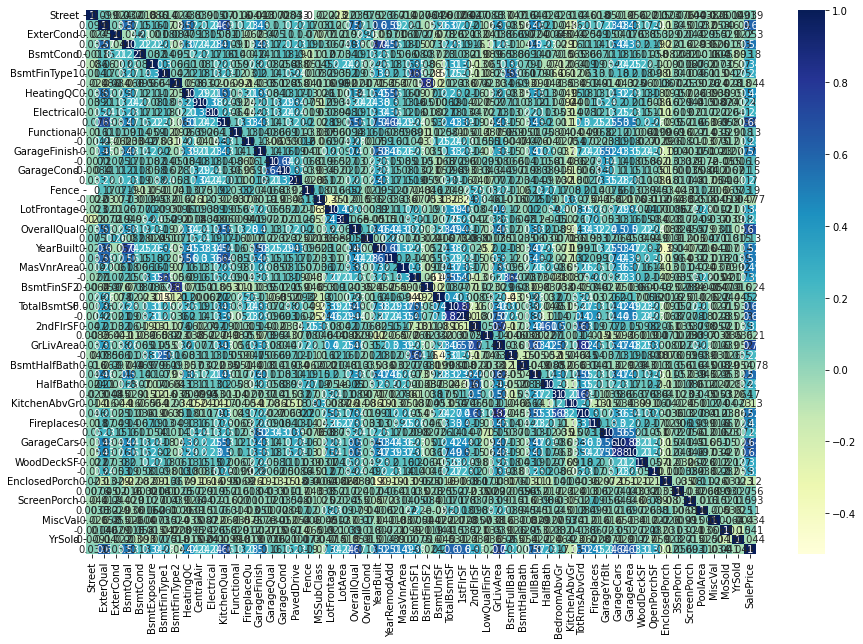

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(merged_df.corr(), cmap="YlGnBu", annot=True);

In [23]:
corr = merged_df.corr()
corr_df = corr.unstack().reset_index()
corr_df.columns = ['feature 1', 'feature 2', 'correlation']
corr_df.sort_values(by='correlation', ascending=False, inplace=True)
corr_df = corr_df[corr_df['feature 1'] != corr_df['feature 2']]
corr_df.head(25)

,feature 1,feature 2,correlation
2564,GarageArea,GarageCars,0.876197
2509,GarageCars,GarageArea,0.876197
2330,TotRmsAbvGrd,GrLivArea,0.823187
1945,GrLivArea,TotRmsAbvGrd,0.823187
1766,1stFlrSF,TotalBsmtSF,0.821471
1711,TotalBsmtSF,1stFlrSF,0.821471
1575,BsmtFinSF2,BsmtFinType2,0.808939
420,BsmtFinType2,BsmtFinSF2,0.808939
192,BsmtQual,YearBuilt,0.739620
1347,YearBuilt,BsmtQual,0.739620


### what is most/least correlated with SalePrice

In [24]:
#corr_df.head()
corr_df[corr_df['feature 1'] == "SalePrice"].sort_values(by='correlation', ascending=False)

,feature 1,feature 2,correlation
3114,SalePrice,GrLivArea,0.700978
3102,SalePrice,OverallQual,0.672459
3091,SalePrice,KitchenQual,0.663108
3124,SalePrice,GarageCars,0.643323
3125,SalePrice,GarageArea,0.627745
3081,SalePrice,ExterQual,0.602881
3111,SalePrice,1stFlrSF,0.601500
3110,SalePrice,TotalBsmtSF,0.601282
3117,SalePrice,FullBath,0.566236
3083,SalePrice,BsmtQual,0.529466


### Any improvement if we drop highly correlated (to each other) and low correlation (to sale price)features?

In [35]:
drop_columns = ['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2', 'Street']

X_train_2 = X_train.copy()
X_train_2.drop(columns=drop_columns, inplace=True)
X_valid_2 = X_valid.copy()
X_valid_2.drop(columns=drop_columns, inplace=True)


calculateMAE(X_train_2, X_valid_2, y_train, y_valid)


MAE: 16894.75773972603


In [46]:
lrCalculateMAE(X_train_2, X_valid_2, y_train, y_valid)

ValueError: A given column is not a column of the dataframe

In [26]:
print(X_train.shape)
print(X_train_2.shape)

(1167, 73)
(1167, 66)


In [27]:
16894.75773972603

16894.75773972603

In [28]:
X_train.head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
93,RL,1.0,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,432,0,0,44,0,0,0,0,8,2009
839,RL,1.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,352,278,0,0,0,0,0,0,6,2008
361,RL,1.0,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,...,470,0,0,0,0,192,0,0,6,2007
666,RL,1.0,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,504,188,124,0,0,0,0,0,11,2006
41,RL,1.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,440,0,138,0,0,0,0,0,12,2006
1289,RL,1.0,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,...,499,212,59,0,0,0,0,0,10,2009
76,RM,1.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,Twnhs,...,297,120,101,0,0,0,0,0,11,2009
478,RL,1.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,694,414,84,0,0,0,0,0,3,2007
1254,RL,1.0,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,518,220,47,0,0,0,0,0,7,2007


## Try with linear regression

In [48]:
from sklearn.linear_model import LinearRegression

mae_, model_, preds_, Xt_trans_, yt_trans_, yt_trans_, yv_trans_ = lrCalculateMAE(X_train, X_valid, y_train, y_valid)


--Xt: (1167, 73)
MAE: 19903.91484795615


In [49]:
#mae, model, preds = lrCalculateMAE(X_train_2, X_valid_2, y_train, y_valid)
print(f'mae_::{mae_}')

mae_::19903.91484795615


In [50]:
pd.DataFrame(model_.coef_, index=Xt_trans_.columns)#.sort_values(by=0, ascending=True).head(50)

ValueError: Shape of passed values is (141, 1), indices imply (73, 1)

In [44]:
model_.coef_.shape

(141,)

In [51]:
Xt_trans_.shape

(1167, 73)